### Question 1

The goal of this project is to identify the person who have conducted frauds in the Enron event. In machine learning language, we are trying to classify the persons involved into two categories: persons of interest and persons not of interest. There are many machine learning algorithms that can potentially solve this classification problem based on the features provided, such as the financial features and the email features. In this data set, there are 145 people, and 19 of them have been labeled as person of interest. There are 14 financial features, which show the salaries and related finanical activieis, and 6 email features, which shows the interactions among those 146 people. Among the email features, the 'email_address' is irrelevant and will be deleted. **Thus, 18 features are left.** As shown in poi_id_help file, **besides the row 'TOTAL' (which has been deleted right in the beginning, see line 43 in poi_id.py)**, there are some other outliers available in the data set, and they are 'LAY KENNETH L' for both 'loan_advances' and 'total_payments', and 'BHATNAGAR SANJAY' for 'restricted_stock_deferred'. Among those three persons, 'LAY KENNETH L' is a poi, and I do not want to delete this person. Thus, instead of removing rows, I will not use the features that have outliers. This approach is risky in that the outliers or the features with outliers themselves could be strong indicators during the classification, but for now I will take the risk, since we have a lot other features that could do the job. **Thus, so far 16 features left.**

### Question 2

First, I want to use two new features: 
1. the ratio of 'to_messages' and 'from_messages'
2. the ratio of 'from_poi_to_this_person' and 'from_this_person_to_poi'
The reason is that pois tend to be more powerful, and they receive more emails than they send.

In this way, put together this two new features with the previous 16 features, giving us 18 features. Since different features have different range of values, I rescale all the features to be in [0,1] **(in the code, Min_Max_scaler is used)** with the following formula 
\begin{align}
\textrm{new_array} = \frac{\textrm{old_array-min(old_array)}}{\textrm{max(old_array)-min(old_array)}}
\end{align}

I use **SelectKBest** to do the feature selection with the two new features, and the result is
```
print select.scores_

[ 18.57570327
   0.21705893
   21.06000171
   11.59554766
   24.46765405
   6.23420114
   25.09754153
   4.20497086
   10.07245453
   9.34670079
   2.10765594
   8.74648553
   1.69882435
   0.1641645
   5.34494152
   2.42650813
   5.55502427
   0.42324423]
```
This scores correspond to the features in the same order as follows
```

 'salary',                  # feature 1
 'deferral_payments',       # feature 2
 'bonus',                   # feature 3
 'deferred_income',         # feature 4
 'total_stock_value',       # feature 5
 'expenses',                # feature 6
 'exercised_stock_options', # feature 7
 'other',                   # feature 8
 'long_term_incentive',     # feature 9
 'restricted_stock',        # feature 10
 'director_fees',           # feature 11
 'shared_receipt_with_poi', # feature 12
 'to_messages',             # feature 13
 'from_messages',           # feature 14
 'from_poi_to_this_person', # feature 15
 'from_this_person_to_poi'] # feature 16
 'new feature 1'            # feature 17
 'new feature 2'            # feature 18
```
It seems that the first new feature (second last in the list)--the ratio of 'to_messages' and 'from_messages'--has a much higher score than the second new feature (last in the list)--the ratio of 'from_poi_to_this_person' and 'from_this_person_to_poi'--. This is a bit surprising, and I do not know why there is this much difference. However, if we look at scores of the original four features, features 13, 14, 15, and 16, it can be seen that features 13 and 14 are not important although their ratio is import, and feature 15 is important although its ratio to feature 16 is not important. We will see what will happen if I delete the two new features, since I will not use them in the final model.

Without the two new features, I do the **SelectKBest** again
```
print select.scores_
[ 18.57570327
   0.21705893
   21.06000171
   11.59554766
   24.46765405
   6.23420114
   25.09754153
   4.20497086
   10.07245453
   9.34670079
   2.10765594
   8.74648553
   1.69882435
   0.1641645
   5.34494152
   2.42650813]
```
This correponds to the first 16 features in the feature list above. It can be seen that features 13, 14, 15 and 16 have roughly the same values as above. If we plot the sorted select.scores (shown below), we can see that there is a big drop after the first 4 features with high scores. However, in the GridSearchCV, I passed three different feature numbers (k), 4, 5, and 10, and **'k = 5' gives the best fit under GaussianNB**. Thus, the top 5 features seems a better choice than the top 4 features.

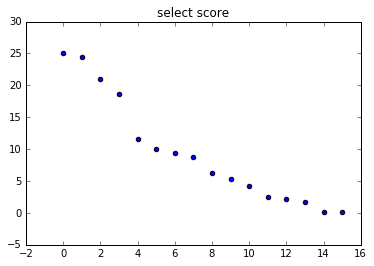

In [3]:
select_score = [18.57570327,0.21705893,21.06000171,11.59554766,24.46765405,6.23420114,25.09754153,4.20497086,
                10.07245453,9.34670079,2.10765594,8.74648553,1.69882435,0.1641645,5.34494152,2.42650813]

import matplotlib.pyplot as plt
plt.scatter(range(16),sorted(select_score, reverse=True))
plt.title('select score')
plt.show()

# Question 3

For the three classifiers I have tried, GaussianNB gives the best compared with SVC and RandomForestClassifier. For the GaussianNB, it has a precision of 0.433, a recall of 0.346. However, for example, SVC gives a recall score of 0.012, which is almost zero. This result is strange to me that both SVC and random forest do not work very well, and there must be some hyper parameters that need to be further tuned in order to make these two algorithms to work. I will keep trying.

# Question 4

In machine learning models, there are some parameters that need to be set before the real training sessions, and these parameters are called hyper parameters [[wiki](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)].  Usually, to make the models work well with the data (fitting and prediction), these parameters need to be carefully chosen, the process of which is called parameter tuning. The choice of the hyper parameters is vital for the sucess of the model. For example, if one is using k-means to do an unsupervised clustering, the total number of clusters k need to be predefined. If this number is not chosen properly, then no matter how advanced your model is, the result will not be good. The algorithm I picked is naive bayes, and it does not need hyper parameters. But for the other two algorithms I tried, such as the random forest, I need to tune the min_samples_split, which represent minimum number of samples that can be used to do another branching. I used GridSearchCV to try different combinations of the hyper parameters, and pick the one giving the best performance. 

# Question 5

Model validation is a type of methods used to evaluate a trained model on a different set of data (validation set) in order to test the generalization power of the trained model. This validation procesure is very important, espectially for the prevention of overfitting. A very complicated model, or a model with too many parameters usually performs very well on the training set of data. However, these models tend to have very high variance, and cannot be generalized well to new data. Thus, validation is used to achieve a balance between model complexity and training performance, or bias-variance-tradeoff. Based on the size of the data set, different strategies should be used. If data is abundant, then one can split the training set into two parts, the first part is used for training, and the second part is used for validation. If data is not that abundant but also not rare, one can use cross validation. However, if data is really rare or the positive and negative samples are imbalanced, then one needs to use stratified split, which is the case in my project. **The reason to use function StratifiedShuffleSplit** is that the positive and negative samples in our data set are extremely skewed, only 19 out of 145 samples are positive. Thus, a normal splitting method can result in a even more skewed situation [[refer here](https://florianhartl.com/thoughts-on-machine-learning-dealing-with-skewed-classes.html)]. For each subgroup, 30% are randomly sampled as test set. 

# Question 6

The evaluation metrics I used are precision and recall. For the naive Bayes, I obtain a precision of 0.43, and a recall of 0.35. In the Enron case, a precision of 0.43 means that among 100 predicted pois, 43 of them are really pois; a recall of 0.35 means that if there are 100 true pois, only 35 of them are correctly identified as such.